In [6]:
%matplotlib inline
import pandas as pd
from urllib.request import Request, urlopen 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

# Rising Food Prices and Poverty in Latin America and the Caribbean:
## Effect of Ukrainian invasion

_Lina Arias, Laura Goyeneche; Roberto Sanchez; Luis Tejerina; Eric Torres_

# Index 

- [Introduction](#introduction)
- [Methodology](#methodology)
- [Data Preparation](#data-preparation)
- [Simulation](#simulation)
- [Next Steps](#next-steps)
- [References](#references)


## [Introduction](introduction) 

Changes in food prices always have an impact on people's lives, especially on the most vulnerable. Understanding the impact that exogenous shocks can have, the location and characteristics of the most affected population is fundamental to be able to carry out policy responses to mitigate their effects. The objective of this exercise is to simulate the impact of rising food prices in the Latin American and Caribbean region using a microdata simulation approach from household surveys.
The current conflict between Russia and Ukraine ombined with other factors such as [increased demand from China](https://www.fas.usda.gov/data/ukraine-conflict-and-other-factors-contributing-high-commodity-prices-and-food-insecurity#:~:text=Russia's%20invasion%20of%20Ukraine%20comes,prices%20are%20up%2090%20percent.) is already affecting food and other commodity prices in ways that may affect Latin America. In 2019 Russia and Ukraine exported 25% of the world’s wheat and Russia is the third oil producer in the world and the leading exporter of fertilizer. As a benchmark a similar change in food prices happened in 2008 from which we can take some lessons learned for the current situation.
The first half of 2008 was marked by significant rises in commodity and food prices. Between 2006 and 2008 price of rice increased by 217 percent, wheat by 136 percent, maize by 125 percent among others.(ALNAP, 2008)  The leading causes for the spike are still debated but most reports seem to point at multiple factors including rising energy prices (which increased production costs and triggered an increase in demand for biofuels), the depreciation of the U.S. dollar (which caused prices in commodities to increase to compensate for the drop in local currency earnings)(IFPRI, 2010) , and food export restrictions caused in part due to weather shocks in Ukraine among others. It is estimated that the 2008 spike may have pushed up to an extra 155m people into extreme poverty worldwide (de Hoyos, R.E. and Medvedev, D., 2011).
The most recent figures from the FAO [food price index](https://www.fao.org/worldfoodsituation/foodpricesindex/en/) show an increase of around 20% from a year ago and an increase in the cereal price index of around 15% from a year ago. The FAO also warns of the risk of further increments of food prices rom 8 to 22% [(FAO, 2022)](https://www.fas.usda.gov/sites/default/files/2022-04/22%2004%2006%20Food%20Prices%20and%20Food%20Security_0.pdf). 





## [Methodology](#methodology) 

Many potential factors are considered in the simulations. 

**First** we simulated the direct effect through the increase in food prices by increasing the poverty lines of the countries in the region. The adjustment is made by impacting each country's poverty line by the percentage that each commodity represents in the line as a whole. For example, if there is an increment of 20% in the price of wheat and wheat represents 20% of the basket used to calculate the county's poverty line, the increment in the poverty line is of 4%.

**Second** we took into account that some households actually bennefit from increases in prices by applying the same rate on increment that is applied to the poverty line to households that are involved in agricultural activities as self employed or as employers. That is we considered that there is no pass through effect to employees in the sector.

**Third** we considered that many commodity exporter countries actually bennefit from the current situation by taking into consideration growth forecasts published by he IMF. The assumption for simulating GDP growth on poverty was that all incomes in the country grow at the same rate. While growth incidence curves tend to vary depending on which years are being analyzed, the assumption seems to be backed by recent growth trends in the region as measured by [the World Bank](https://www.worldbank.org/en/topic/poverty/lac-equity-lab1/economic-growth/growth-incidence-curve#:~:text=The%20Growth%20Incidence%20Curve%20(GIC,between%20two%20points%20in%20time) except for countries where the poverty rate is less than 10%. For the botton decile in the region growth has tended to be less benefficial than for he rest.


##  Other caveats to be considered

- We currently assume that increases in international prices are fully passed through to observed household prices.
- We do not take into account substitution effects among the products consumed by a households for practical reasons since these in turn would trigger (likely) smaller increases in prices of substitute goods.
- changes in income caused by changes in food prices through agricultural wages. 
- We do not analyze consumption patterns at the micro level since most surveys used do not have detailed information on consumption.


## [Data Preparation](data-preparation) 

### Harmonizing household surveys

Household surveys are the instruments used to analyze poverty and inequality. In this project, the first step was to work on creating a harmonized household-level data set for 25 countries in the region. The list of countries, household surveys, year of data collection and sample sizes are reported in Table 1.

#### Income and consumption

Given that the objective is to analyze the impact of price variation on national poverty rates, it was essential to replicate and harmonize its construction across all countries in the region. To achieve this, the main preprocessing work was the reconstruction of each country's official per capita income/consumption methodology. In Latin America, most countries use household income to measure poverty rates against a welfare line. However, some countries prefer per capita consumption, arguing that consumption fluctuates less over time than income, keeping results more comparable over time (IDB, 2018). This is the case for countries such as Suriname, Barbados and Peru. 

When official per capita income is not available the harmonized variables calculated by the SCLteam are used.

### Poverty lines 

In order to replicate the official poverty of each country, it is also necessary to use the official poverty thresholds. To define them, most countries use the concept of the basic food and non-food basket. On the one hand, the basic food basket establishes the minimum economic threshold to satisfy food needs based on the consumption habits of households in each country; if a family is below this threshold, it is defined as extreme poverty. On the other hand, the non-food basic basket adds non-food components to the basic basket; this threshold is used to identify the population living in poverty. 

Due to lack of information it was not possible to replicate all the national poverty figures. i these cases international poverty lines were used. To make the lines comparable with the national income of the year of the survey they are adjusted and deflated with the Consumer Price Index (CPI) and the Purchasing Power Parity - PPP. 

Equation (*) is used to calculate the countries' monthly international poverty lines per person. In this line, PPP data are from the World Bank's World Development Indicators (WDI), and CPI data are from the International Monetary Fund's (IMF) World Economic Outlook (WEO) database. More details 

$$
lp_{ci}=(lp∗\frac{365}{12})∗[PPP_{2011} ∗ \frac{PCI_{year_{i}}}{PCI_{2011}}]
$$


### Household Food Basket Composition

In order to focus the price increase on specific commodities, we consider the relative weight of each component in the basic food basket. We use the Economic Commission for Latin America and the Caribbean' (CEPAL, acronym in Spanish) Basic Food Basket. They use the Expenditure Household Surveys to obtain the expenditure and the consumer of the household. In this line, the CEPAL generates the Basic Food Basket choosing a limited number of products that represent the consumption of households. 

The products are initially classified into 14 categories: 1. Grains; 2. Bread and cereals; 3. Legumes; 4. Vegetables (greens or vegetables); 5. Roots and tubers; 6. Fruits; 7. Sugars; 8. Fats and oils; 9. Milk and dairy products; 10; 10. Meat, poultry, fish, seafood, and eggs; 11; 11. Non-alcoholic beverages; 12. Alcoholic beverages; 13. Food products not previously specified; 14. Meals and beverages outside the home. In the dataset, they report the quantities and the calories per capita (CEPAL, p. 49, 2018)

#### Identification of food-producers

As part of the simulation exercise, we assume that the effects of the market imbalance caused by the invasion have had a heterogeneous impact on the economic sectors. Therefore, as a first approximation, we consider the food-production sector.

In this subsection, our goal is to identify within the household and employment surveys those individuals who produce food or who otherwise perform tasks closely linked to the agricultural sector (whether they have agriculture as their main or secondary activity). First, we identified all workers who are business owners or self-employed. From this group, only those in the agricultural sector are identified. As a result, we have a column that gives values equal to 1 to employers and self-employed who belong to the agricultural sector and 0 to the rest.

#### GDP Growth

Rising food prices could affect real household incomes, at the same time, the economic growth of countries also has the potential to affect them directly and indirectly. (Laborde et al., 2019).  To control for this effect, we use the International Monetary Fund (IMF) economic growth projections for the year 2022.  In this phase of the project we impact the income of all households in each country with the same weighting.

### Poverty lines adjustment

The simulation of increases in the poverty line works by adjusting the proportion of the poverty line that is composed of the commodities in each country that were affected by the price spike.


$$
povertyline\Delta_{country_i} =  povertyline_{country_i} * (1 - \omega_{country_i} ) + \\
                                 povertyline_{country_i} * \omega_{country_i} * (1 + shock\_weight)
$$




#### Simulation Components 

- The user can choose which components will be affected by the exogenous shock 

```
shock_component = ['Alimentos fuera del hogar',
               'Azúcares', 'Bebidas no alcohólicas',
               'Carnes, aves y huevos',
               'Frutas', 
               'Granos', 'Panes y\ncereales',
               'Grasas', 'Leguminosas',
               'Lácteos', 
               'Productos no especificados previamente', 'Raíces y\ntubérculos', 'Vegetales'
              ]
```

- The User can choose the pct change of exogenous shock

```
shock_weight = 0.20
```

- And specify whether the impact is focused on a subgroup of the population or if its a general impact

```
shock_population = {'sec_agri': 0}
# In this example self-employed or independent workers in the agricultural sector will not be impacted by the Shock
```

## Results

For the main simulation an increase of 20% in the poverty line was used in line with the most recent forecasts from the FAO. Using this stimate the result is a xx increase in the poverty rate of the region. Some countries actually lower their poverty rate due to the macroeconomic growth effect. 


<table><tr>
<td> 
  <p align="center" style="padding: 10px">
    <img alt="Forwarding" src="assets/simulation_all_no_meat.png" width="400">
    <br>
    <em style="color: grey">Forwarding (Anahtarlama)</em>
  </p> 
</td>
<td> 
  <p align="center">
    <img alt="Routing" src="assets/simulation_grain_cereal.png" width="400">
    <br>
    <em style="color: grey">Routing (yönlendirme)</em>
  </p> 
</td>
</tr></table>

## [References](references) 

- Artuc, Erhan; Porto, Guido; Rijkers, Bob. 2019. Household Impacts of Tariffs : Data and Results from Agricultural Trade Protection. Policy Research Working Paper;No. 9045. World Bank, Washington, DC. © World Bank. https://openknowledge.worldbank.org/handle/10986/33015 License: CC BY 3.0 IGO.” 
- CEPAL. Medición de la pobreza por ingresos. Actualización de metodología y resultados. 2018;https://www.cepal.org/es/publicaciones/44314-medicion-la-pobreza-ingresos-actualizacion-metodologica-resultados 
- Food and Agriculture Organization of the united Nations -FAO. World Food Situation. April 7, 2022. https://www.fao.org/worldfoodsituation/foodpricesindex/en/  
- Laborde, D., Lakatos, C., & Martin, W. J. (2019). Poverty impact of food price shocks and policies (Ser. World bank e-library). World Bank. Retrieved April 7, 2022, from http://elibrary.worldbank.org/doi/book/10.1596/1813-9450-8724. 
- Schmidt, E, Dorosh, P, & Gilbert, R. Impacts of COVID-19 induced income and rice price shocks on household welfare in Papua New Guinea: Household model estimates. Agricultural Economics. 2021; 52: 391– 406. https://doi.org/10.1111/agec.12625 
- ALNAP. 2008. The Global Food Price Crisis: Lessons and Ideas for Relief Planners and Managers. 
- IFPRI. 2010. Reflections on the Global Food Crisis How has it hurt? How did it happen? And how can we prevent the next one? Research monograph 165
- de Hoyos, R.E. and Medvedev, D. (2011), Poverty Effects of Higher Food Prices: A Global Perspective. Review of Development Economics, 15: 387-402. https://doi.org/10.1111/j.1467-9361.2011.00615.x
- Food and Agriculture Organization of the united Nations. 2022. Information Note. The importance of Ukraine and the Russian Federation for global agricultural markets and the risks associated with the current conflict. Rome. https://www.fao.org/fileadmin/user_upload/faoweb/2022/Info-Note-Ukraine-Russian-Federation.pdf




## Annex

#### <center>Table 1</center>


| Country 	| year 	|                                             Survey                                            	| National poverty lines 	| Official   income/consumption  	|  Income/Consumption 	|
|:-------:	|:----:	|:---------------------------------------------------------------------------------------------:	|:----------------------:	|:------------------------------:	|:-------------------:	|
|   ARG   	| 2020 	| Permanent Continuous Household Survey (EPHC acronym in Spanish)                               	|           Yes          	|               Yes              	|    Monthly income   	|
|   BHS   	| 2014 	| Labor Force & Household Survey                                                                	|           No           	|               No               	|    Monthly income   	|
|   BLZ   	| 2007 	| Labor Force & Household Survey                                                                	|           No           	|               No               	|    Monthly income   	|
|   BOL   	| 2020 	| Household Survey (ECH, acronym in Spanish)                                                    	|           Yes          	|               Yes              	|    Monthly income   	|
|   BRA   	| 2020 	| Brazilian National Household Sample Survey (PNADC, acronym in Potuguese)                      	|           Yes          	|               No               	|    Monthly income   	|
|   BRB   	| 2016 	| Labor Force & Household Survey                                                                	|           Yes          	|               No               	| Monthly consumption 	|
|   CHL   	| 2020 	| National Socioeconomic Characterization Survey (CASEN, acronym in   Spanish)                  	|           Yes          	|               Yes              	|    Monthly income   	|
|   COL   	| 2020 	| Large Integrated Household Survey (GEIH, acronym in Spanish)                                  	|           Yes          	|               Yes              	|    Monthly income   	|
|   CRI   	| 2021 	| National Household Survey (ENAHO, acronym in Spanish)                                         	|           Yes          	|               Yes              	|    Monthly income   	|
|   DOM   	| 2020 	| Continuous National Labor Force Survey (ENCFT, acronym in Spanish)                            	|           Yes          	|               Yes              	|    Monthly income   	|
|   ECU   	| 2020 	| National Survey on Employment Unemployment and Underemployment (ENEMDU,   acronym in Spanish) 	|           Yes          	|               Yes              	|    Monthly income   	|
|   GTM   	| 2014 	| National Survey of Living Conditions (ENCOVI, acronym in Spanish)                             	|           Yes          	|               Yes              	|  Annual expenditure 	|
|   GUY   	| 2019 	| Labour Force Surveys (LFS)                                                                    	|           No           	|               No               	|    Monthly income   	|
|   HND   	| 2019 	| Permanent Multipurpose Household Survey (EPHPM, acronym in Spanish)                           	|           Yes          	|               Yes              	|    Monthly income   	|
|   JAM   	| 2018 	| Survey of Living Conditions (SLC)                                                             	|           Yes          	|               Yes              	|    Monthly income   	|
|   MEX   	| 2020 	| National Household Income and Expenditure Survey (ENIGH, acronym in   Spanish)                	|           Yes          	|               Yes              	|    Monthly income   	|
|   NIC   	| 2014 	| Living Standard Measurement Survey (EMNV, acronym in Spanish)                                 	|           Yes          	|               Yes              	| Monthly consumption 	|
|   PAN   	| 2019 	| Multipurpose Survey (EHPM, acronym in Spanish)                                                	|           Yes          	|               No               	|    Monthly income   	|
|   PER   	| 2020 	| National Household Survey (ENAHO, acronym in Spanish)                                         	|           Yes          	|               Yes              	| Monthly consumption 	|
|   PRY   	| 2020 	| Permanent Continuous Household Survey (EPHC acronym in Spanish)                               	|           Yes          	|               Yes              	|    Monthly income   	|
|   SLV   	| 2020 	| Multipurpose Household Survey (EHPM, acronym in Spanish)                                      	|           Yes          	|               Yes              	|    Monthly income   	|
|   SUR   	| 2017 	| Survey of Living Conditions (SLC)                                                             	|           No           	|               No               	| Monthly consumption 	|
|   TTO   	| 2015 	| Continuous Sample Survey of Population (CSSP)                                                 	|           No           	|               Yes              	|    Monthly income   	|
|   URY   	| 2020 	| Continuous Household Survey (ECH, acronym in Spanish)                                         	|           Yes          	|               Yes              	|    Monthly income   	|
|   VEN   	| 2021 	| National Survey of Living Conditions (ENCOVI, acronym in   Spanish)                           	|           No           	|               No               	|    Monthly income   	|





## Context

### Food Price Trends

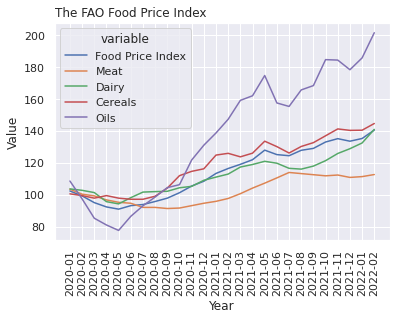

In [4]:
sns.set_theme()

req = Request('https://www.fao.org/fileadmin/templates/worldfood/Reports_and_docs/Food_price_indices_data_mar715.csv')
req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
content = urlopen(req)
df = pd.read_csv(content, skiprows=2,usecols = ['Date', 'Food Price Index', 'Meat', 'Dairy', 'Cereals', 'Oils'])
df = df[df.Date>='2020-01']
df = pd.melt(df, id_vars='Date', value_vars=['Food Price Index', 'Meat', 'Dairy', 'Cereals', 'Oils'])
g = sns.lineplot(x="Date", y="value", hue="variable", data=df)
plt.title("The FAO Food Price Index", loc='left')
plt.xlabel('Year')
plt.ylabel('Value')
plt.xticks(rotation = 90)
plt.show()
# https://www.fao.org/worldfoodsituation/foodpricesindex